In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle

In [5]:
df = pd.read_excel(r"C:\Users\pazmo\Desktop\everything\Projects\Eclipse Analytics\K-Means-Clustering-NBA-Players\2019-20allStatsClean.xlsx")
df = df.set_index('Player').astype(float)


In [6]:
dfPlayerCol = df.reset_index()
df.head()

,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,...,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP
Player,,,,,,,,,,,,,,,,,,,,,
Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,...,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32
Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,...,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93
Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,...,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29
Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,...,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06
Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,...,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24


In [7]:
features = list(df.columns)
x= df.loc[:, features].values
x= StandardScaler().fit_transform(x)

In [8]:
variance_list = []

for n_components in range(2, 31):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

For n_components = 2, explained variance ratio is 0.4392580057127524
For n_components = 3, explained variance ratio is 0.5676290453882781
For n_components = 4, explained variance ratio is 0.6268184169226136
For n_components = 5, explained variance ratio is 0.6755451751246613
For n_components = 6, explained variance ratio is 0.7169413050732255
For n_components = 7, explained variance ratio is 0.7490113047677629
For n_components = 8, explained variance ratio is 0.7782932819597765
For n_components = 9, explained variance ratio is 0.8053024983551441
For n_components = 10, explained variance ratio is 0.8287327218042013
For n_components = 11, explained variance ratio is 0.8506660305368818
For n_components = 12, explained variance ratio is 0.8717631452074835
For n_components = 13, explained variance ratio is 0.8886322192886178
For n_components = 14, explained variance ratio is 0.9044923898506939
For n_components = 15, explained variance ratio is 0.9189769957564603
For n_components = 16, expla

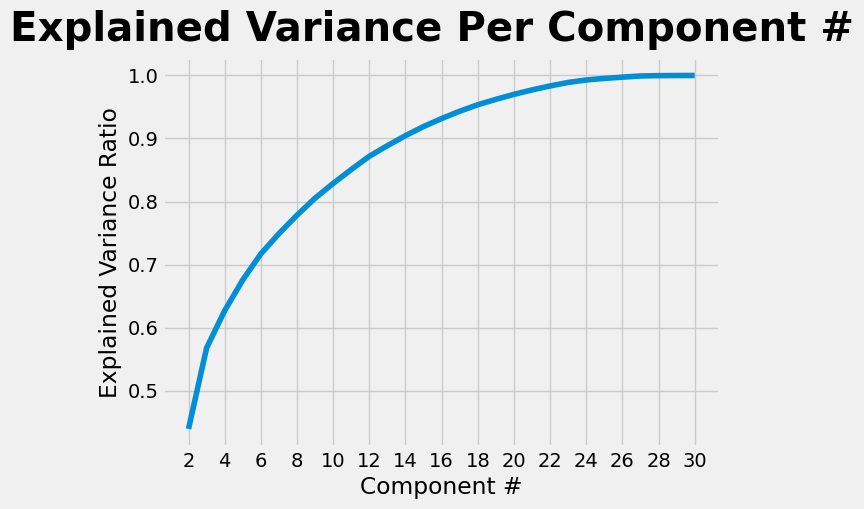

In [9]:

plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 31), variance_list)

ax.set_xlabel('Component #')
ax.set_ylabel('Explained Variance Ratio')

ax.set_xticks(np.arange(2, 32, 2.0))

pca_fig.suptitle("Explained Variance Per Component #", weight = 'bold', size = 29)

pca_fig.savefig('pca-variance.png', dpi = 400, bbox_inches = 'tight')


In [10]:
from numpy import diff

dx = 1
y = variance_list
dy = diff(y)/dx
print(dy)

[1.28371040e-01 5.91893715e-02 4.87267582e-02 4.13961299e-02
 3.20699997e-02 2.92819772e-02 2.70092164e-02 2.34302234e-02
 2.19333087e-02 2.10971147e-02 1.68690741e-02 1.58601706e-02
 1.44846059e-02 1.26465426e-02 1.16658908e-02 1.02577081e-02
 8.53678279e-03 7.93402940e-03 7.01946784e-03 6.30805203e-03
 5.58828216e-03 3.90799990e-03 2.47141243e-03 2.01921057e-03
 1.85967033e-03 5.10781019e-04 2.09069487e-04 8.81047457e-05]


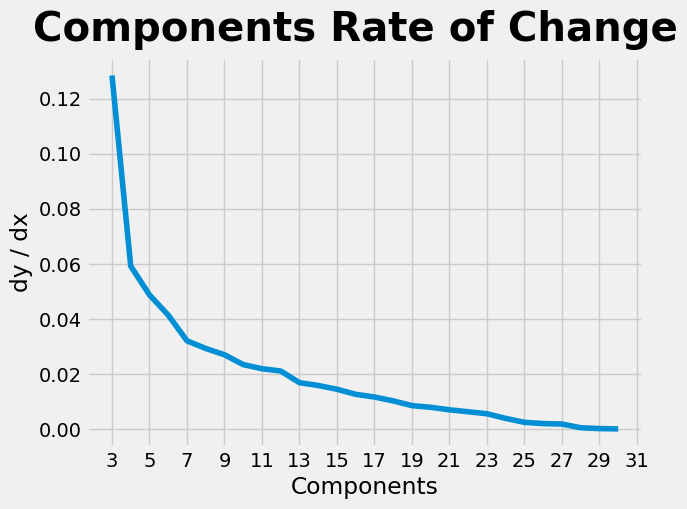

In [11]:
pca_deriv, ax = plt.subplots()

ax.plot(range(3, 31), dy)

ax.set_xlabel('Components')
ax.set_ylabel('dy / dx')

ax.set_xticks(np.arange(3, 32, 2.0))

pca_deriv.suptitle("Components Rate of Change", weight = 'bold', size = 29)

pca_deriv.savefig('pca-deriv.png', dpi = 400, bbox_inches = 'tight')